# 분할 적용 예시

SPLIT - APPLY - COMBINE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_dict={'colour':['Yellow','Black','Blue','Red','Yellow','Black','Blue',
                      'Red','Yellow','Black','Blue','Red','Yellow','Black','Blue','Red','Blue','Red'],
           'sales':[100000,150000,80000,90000,200000,145000,120000,
                    300000,250000,200000,160000,90000,90100,150000,142000,130000,400000,350000],
          'transactions':[100,150,820,920,230,120,70,250,250,110,130,860,980,300,150,170,230,280],
           'product':['type A','type A','type A','type A','type A','type A','type A',
                      'type A','type A','type B','type B','type B','type B','type B','type B','type B','type B','type B']}

In [4]:
data_sales = pd.DataFrame(sales_dict)
data_sales

,colour,sales,transactions,product
0,Yellow,100000,100,type A
1,Black,150000,150,type A
2,Blue,80000,820,type A
3,Red,90000,920,type A
4,Yellow,200000,230,type A
5,Black,145000,120,type A
6,Blue,120000,70,type A
7,Red,300000,250,type A
8,Yellow,250000,250,type A
9,Black,200000,110,type B


* 시각화

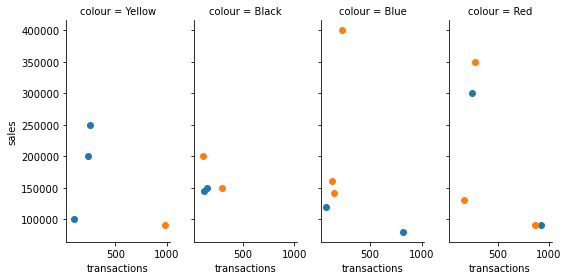

In [7]:
graph = sns.FacetGrid(data_sales, col='colour', height=4, hue='product',aspect=.5)
graph.map(plt.scatter, 'transactions', 'sales')

In [9]:
# Split : Group by 'colour'
data_gby = data_sales.groupby('colour')
print(type(data_gby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [10]:
# check name of groups
data_gby.groups

{'Black': [1, 5, 9, 13], 'Blue': [2, 6, 10, 14, 16], 'Red': [3, 7, 11, 15, 17], 'Yellow': [0, 4, 8, 12]}

In [11]:
# 키, 쌍값을 인쇄
for k, v in data_gby:
    print('GroupName:',k)
    print(v)
    print('-----------------------')

GroupName: Black
   colour   sales  transactions product
1   Black  150000           150  type A
5   Black  145000           120  type A
9   Black  200000           110  type B
13  Black  150000           300  type B
-----------------------
GroupName: Blue
   colour   sales  transactions product
2    Blue   80000           820  type A
6    Blue  120000            70  type A
10   Blue  160000           130  type B
14   Blue  142000           150  type B
16   Blue  400000           230  type B
-----------------------
GroupName: Red
   colour   sales  transactions product
3     Red   90000           920  type A
7     Red  300000           250  type A
11    Red   90000           860  type B
15    Red  130000           170  type B
17    Red  350000           280  type B
-----------------------
GroupName: Yellow
    colour   sales  transactions product
0   Yellow  100000           100  type A
4   Yellow  200000           230  type A
8   Yellow  250000           250  type A
12  Yellow   90100

In [13]:
# 여러 열에 의해 생성된 그룹에서 집계
# Note : as_index = True
data_prod_colour_index = data_sales.groupby(['product','colour'], as_index=True).sum()
data_prod_colour_index
# 판매, 거래의 합계

sales  transactions
product colour                      
type A  Black   295000           270
        Blue    200000           890
        Red     390000          1170
        Yellow  550000           580
type B  Black   350000           410
        Blue    702000           510
        Red     570000          1310
        Yellow   90100           980

In [14]:
# 색인이 아닌 열로 가져오게 함
data_prod_colour_index1 = data_sales.groupby(['product','colour'], as_index=False).sum()
data_prod_colour_index1
# 판매, 거래의 합계

,product,colour,sales,transactions
0,type A,Black,295000,270
1,type A,Blue,200000,890
2,type A,Red,390000,1170
3,type A,Yellow,550000,580
4,type B,Black,350000,410
5,type B,Blue,702000,510
6,type B,Red,570000,1310
7,type B,Yellow,90100,980


In [ ]:
# 여러 열로 그룹화된 사용자 지정 집계


# defaultdict

In [15]:
from collections import defaultdict

In [16]:
int_dict = defaultdict(int)

In [17]:
int_dict

defaultdict(int, {})

In [22]:
# 초기값 설정필요없이 갯수셀때 편리함
letters = 'dongdongfather'
letters_dict = defaultdict(int)
for k in letters:
    letters_dict[k] = letters_dict[k]+1
    print(k)
    print(letters_dict[k])
    print('------------')
letters_dict

d
1
------------
o
1
------------
n
1
------------
g
1
------------
d
2
------------
o
2
------------
n
2
------------
g
2
------------
f
1
------------
a
1
------------
t
1
------------
h
1
------------
e
1
------------
r
1
------------


defaultdict(int,
            {'d': 2,
             'o': 2,
             'n': 2,
             'g': 2,
             'f': 1,
             'a': 1,
             't': 1,
             'h': 1,
             'e': 1,
             'r': 1})